In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

oil = pd.read_csv(r"..\Data\01_raw\oil.csv")
train = pd.read_csv(r"..\Data\01_raw\train.csv")

In [4]:
train_oil_df = pd.merge(train, oil, on='date', how='outer')

In [5]:
train_oil_df['dcoilwtico'] = train_oil_df['dcoilwtico'].interpolate(method='linear')

In [6]:
train_oil_df['dcoilwtico'][0] = 93.14

C:\Users\User131f\AppData\Local\Temp\ipykernel_18692\3950267356.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_oil_df['dcoilwtico'][0] = 93.14
C:\Users\User131f\AppData\Local\Temp\ipykernel_18692\3950267356.py:1: SettingWithCopyWa

In [7]:
train_oil_df.loc[train_oil_df['date'] == '2013-01-01', 'dcoilwtico'] = train_oil_df.loc[train_oil_df['date'] == '2013-01-01', 'dcoilwtico'].fillna(method='ffill')

C:\Users\User131f\AppData\Local\Temp\ipykernel_18692\2154089988.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_oil_df.loc[train_oil_df['date'] == '2013-01-01', 'dcoilwtico'] = train_oil_df.loc[train_oil_df['date'] == '2013-01-01', 'dcoilwtico'].fillna(method='ffill')


In [8]:
np.sum(pd.isna(train_oil_df['dcoilwtico']))

0

<Axes: xlabel='dcoilwtico', ylabel='sales'>

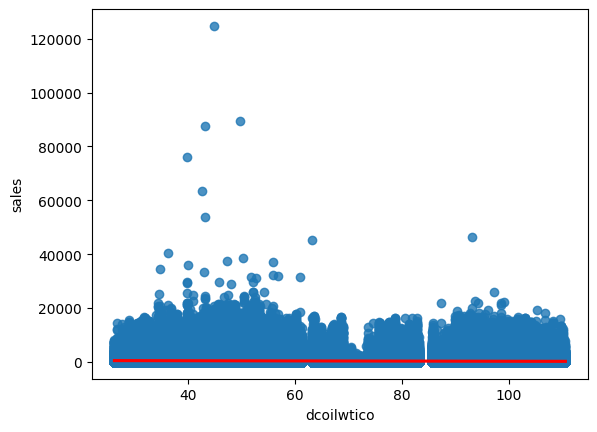

In [9]:
# sns.regplot(data = train_oil_df, x='dcoilwtico', y='sales', line_kws=dict(color='r'))

In [10]:
train_oil_df[['dcoilwtico','sales']].corr()

,dcoilwtico,sales
dcoilwtico,1.000000,-0.074988
sales,-0.074988,1.000000


Sales and oil price has no corelation.